In [1]:
1+1

2

In [ ]:
include("src/gravlens.jl")

In [20]:
hx, hy, hu, hdu, hia, hoa, hda, hθ =
    harmonic(0.5, 200.0, pi/58, 0.0000001, 10000);
dx, dy, du, ddu, dia, doa, dda, dθ =
    numeric_tiso(0.5, 200.0, π/58, R200(0.5, 200.0), 0.0000001, 10000);
tx, ty, tu, tdu, tia, toa, tda, tθ =
    thin_tiso(0.5, 200.0, π/58, R200(0.5, 200.0), 0.0000001, 10000);

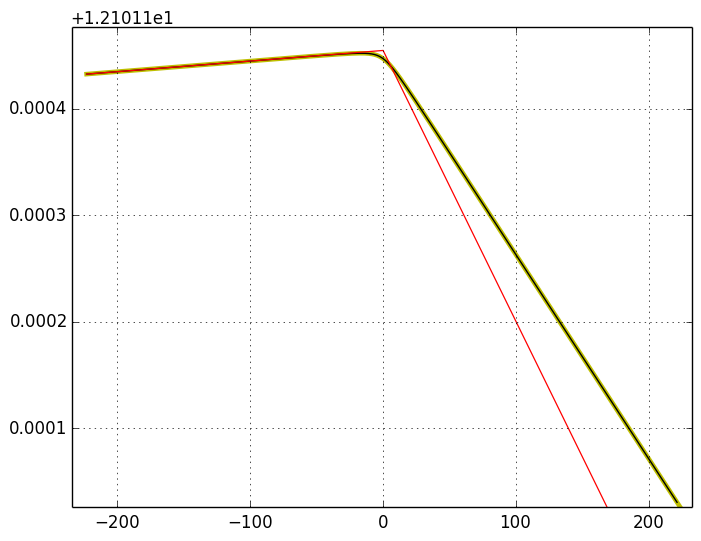

In [22]:
ixs = find((hx.>-300).*(hx.<300))
hx=hx[ixs]
hy=hy[ixs]
plot(dx, dy, "-y", lw=3.3)
hold(true)
plot(hx, hy, "-k")
plot(tx, ty, "-r", lw=0.9)
x0 = cos(pi/6)*R200(1.0,200)
y0 = sin(pi/6)*R200(1.0,200)
plot([-x0, x0], [y0, y0+0.000001*2x0],"--k")
xlim(minimum(hx)*1.05, maximum(hx)*1.05)
ylim(minimum(hy)*0.9999996, maximum(hy)*1.000002)
grid(true)

In [23]:
rs = 3.3e6
b = 4

tg = b/rs
dx, dy, du, ddu, dia, doa, dda, dθ =
    numeric_tiso(0.1, 200.0, 0.0, rs, tg, 100000);

spl = Spline1D(dθ, du, k=5);
@show θ0 = fzero(t->evaluate(spl,t)-1.0/R200(0.1,200) , 0.005)
spl = Spline1D(dθ, ddu, k=5);
tgα0 = tan(ray_angle(θ0, R200(0.1,200), evaluate(spl, θ0)))

hx, hy, hu, hdu, hia, hoa, hda, hθ =
    harmonic(0.1, 200.0, θ0, tgα0, 100000);
tx, ty, tu, tdu, tia, toa, tda, tθ =
    thin_tiso(0.1, 200.0, 0.0, rs, tg, 100000);
ex, ey, eu, edu, eia, eoa, eda, eθ =
numeric_tiso_el(0.1, 200.0, 0.0, rs, tg, 100000, reltol=1.0e-14, abstol=1.0e-15);

ix=find(eu.==maximum(eu))[1]
x=ex[ix]
y=ey[ix]
rmin=sqrt(x*x+y*y)

hex, hey, heu, heθ, heia = harmonic_e(0.1, 200.0, rmin, tgα0, 100000);

θ0 = fzero((t->begin  # In[23], line 9:
                evaluate(spl,t) - 1.0 / R200(0.1,200)
            end),0.005) = 0.019507065826707682
dα = (π / 2 + a1) - a2 = 1.5707969383842695
dα - π / 2 = 6.115893729230493e-7


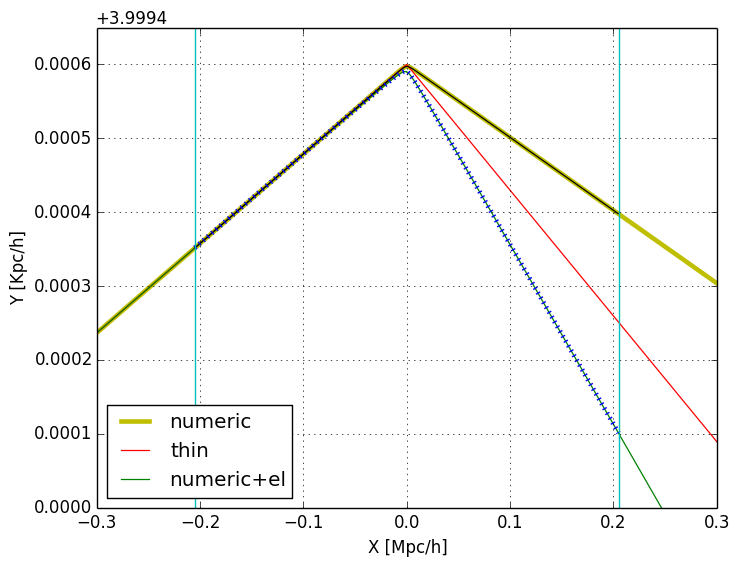

(3.9994,4.00005)

In [24]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
plot(hx/1e3, hy, "-k",lw=0.9)
plot(hex/1e3, hey, ":b",lw=3.5)
legend(["numeric","thin","numeric+el"], loc=3)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
r=R200(0.1,200)
x=cos(linspace(0,2π,500)).*r
y=sin(linspace(0,2π,500)).*r
plot(x/1e3,y,"-c")
xlim(-0.3,0.3)
ylim(3.9994,4.00005)

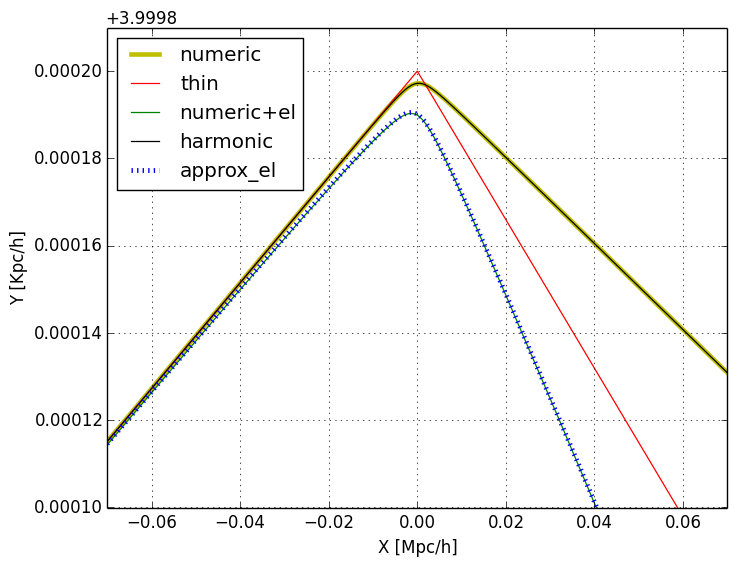

(3.9999,4.00001)

In [25]:
plot(dx/1e3, dy, "-y",lw=3.3)
hold(true)
plot(tx/1e3, ty, "-r",lw=0.9)
plot(ex/1e3, ey, "-g",lw=0.9)
plot(hx/1e3, hy, "-k",lw=0.9)
plot(hex/1e3,hey,":b",lw=3.5)
legend(["numeric","thin","numeric+el","harmonic","approx_el"], loc=2)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
xlim(-0.07,0.07)
ylim(3.9999,4.00001)

In [29]:
bs=Float64[]
tdas=Float64[]
ddas=Float64[]
edas=Float64[]

rs = 3.3e6
for b in linspace(4, 500, 100)
    push!(bs, b)

    tg = b/rs
    dx, dy, du, ddu, dia, doa, dda, dθ =
        numeric_tiso(0.1, 500.0, 0.0, rs, tg, 100);
    tx, ty, tu, tdu, tia, toa, tda, tθ =
        thin_tiso(0.1, 500.0, 0.0, rs, tg, 100);
    ex, ey, eu, edu, eia, eoa, eda, eθ =
    numeric_tiso_el(0.1, 500.0, 0.0, rs, tg, 100);
    
    push!(tdas, tda)
    push!(ddas, dda)
    push!(edas, eda);
end;

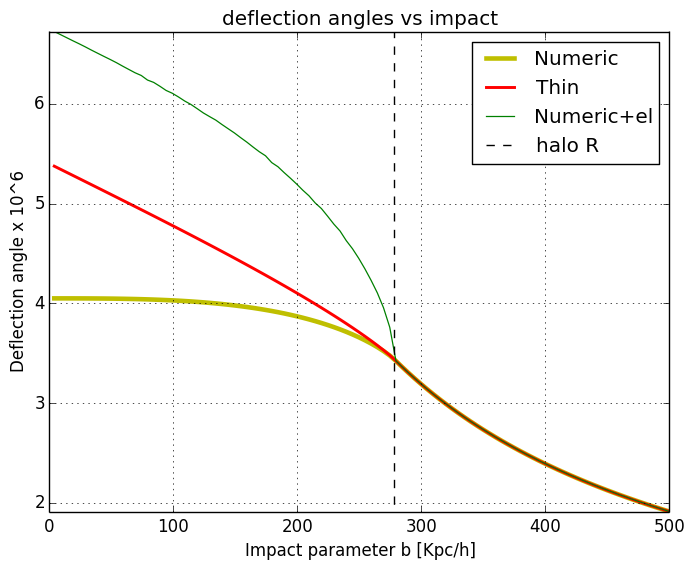

PyObject <matplotlib.text.Text object at 0x31a3b9650>

In [30]:
plot(bs, ddas*1e6, "-y", lw=3.3)
hold(true)
plot(bs, tdas*1e6, "-r", lw=2.1)
plot(bs, edas*1e6, "-g", lw=0.9)
r=R200(0.1,500.0)
plot([r,r],[0,1e7],"--k")
ylim(1e6*minimum(tdas), 1e6*maximum(edas))
grid(true)
xlabel("Impact parameter b [Kpc/h]")
ylabel("Deflection angle x 10^6")
legend(["Numeric","Thin","Numeric+el","halo R"])
title("deflection angles vs impact")

In [3]:
massfunc(r) = tnfw_m(0.1, 500.0, 20.0, r);
rhofunc(r) = tnfw_ρ(0.1, 500.0, 20.0, r);
projmass(r) = tnfw_mp(0.1, 500.0, 20.0, r);

In [ ]:
bs=Float64[]
bnfw_tdas=Float64[]
bnfw_ddas=Float64[]
bnfw_edas=Float64[]

rs = 3.3e6
for b in big(linspace(0.001, 0.1, 10))
    println(b)
    push!(bs, b)

    tg = b/rs
    dx, dy, du, ddu, dia, doa, dda, dθ =
        numeric(massfunc, 0.0, rs, tg, 1000);
    tx, ty, tu, tdu, tia, toa, tda, tθ =
        thin(projmass, 0.0, rs, tg, 1000);
    ex, ey, eu, edu, eia, eoa, eda, eθ =
        numeric_el(massfunc, rhofunc, 0.0, rs, tg, 1000);
    
    push!(bnfw_tdas, float(tda))
    push!(bnfw_ddas, float(dda))
    push!(bnfw_edas, float(eda));
end;

9.999999999999999999999999999999999999973e-04
1.199999999999999999999999999999999999999e-02
2.300000000000000000000000000000000000004e-02
3.399999999999999999999999999999999999999e-02
4.499999999999999999999999999999999999994e-02
5.600000000000000000000000000000000000008e-02
6.699999999999999999999999999999999999985e-02
7.800000000000000000000000000000000000017e-02


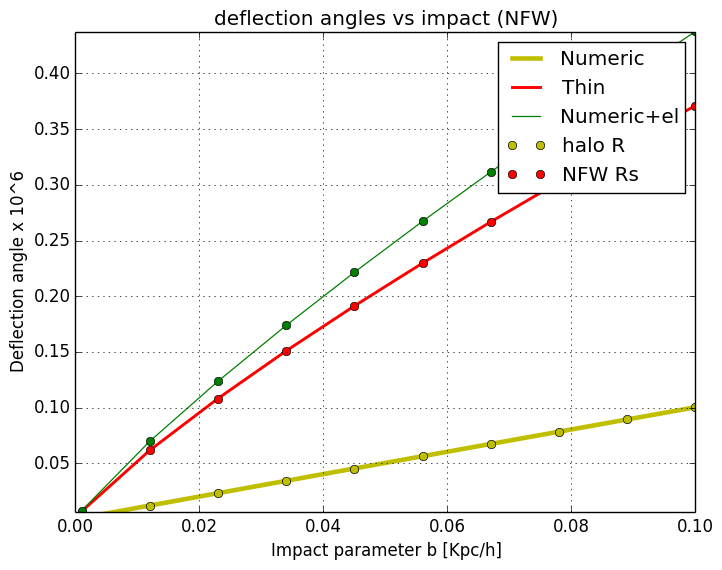

(0,0.1)

In [17]:
plot(bs, nfw_ddas*1e6, "-y", lw=3.3)
hold(true)
plot(bs, nfw_tdas*1e6, "-r", lw=2.1)
plot(bs, nfw_edas*1e6, "-g", lw=0.9)

plot(bs, bnfw_ddas*1e6, "oy", lw=3.3)
plot(bs, bnfw_tdas*1e6, "or", lw=2.1)
plot(bs, bnfw_edas*1e6, "og", lw=0.9)



r=R200(0.1,500.0)
plot([r,r],[0,1e7],"--k")
plot([13.91,13.91],[0,1e7],"-k")
ylim(1e6*minimum(nfw_tdas), 1e6*maximum(nfw_edas))
grid(true)
xlabel("Impact parameter b [Kpc/h]")
ylabel("Deflection angle x 10^6")
legend(["Numeric","Thin","Numeric+el","halo R", "NFW Rs"])
title("deflection angles vs impact (NFW)")
xlim(0,0.1)

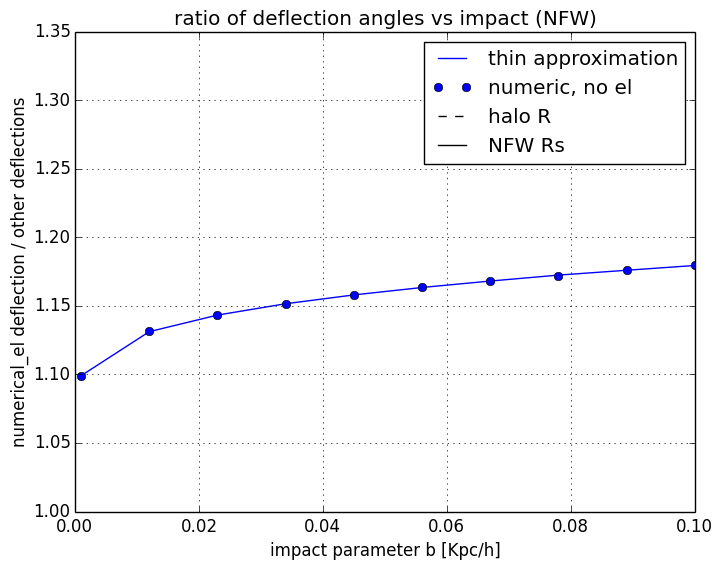

(1.0,1.35)

In [18]:
plot(bs, nfw_edas./nfw_tdas,"-b")
hold(true)
plot(bs, bnfw_edas./bnfw_tdas,"ob")


#plot(bs, nfw_edas./nfw_ddas, "-r")
plot([278,278],[0.8,2.4],"--k")
plot([13.91,13.91],[0.8,2.4],"-k")
grid(true)
xlabel("impact parameter b [Kpc/h]")
ylabel("numerical_el deflection / other deflections")
legend(["thin approximation","numeric, no el","halo R","NFW Rs"], loc=1)
title("ratio of deflection angles vs impact (NFW)")
xlim(0.0,0.1)
ylim(1.0,1.35)

# Time

In [64]:
b = 3.0;
rs = 3.3e6;
tg = b/rs
f = 1.209
up_dx, up_dy, up_du, up_ddu, up_dia, up_doa, up_dda, up_dθ =
    numeric(massfunc, 0.0, rs, tg, 100000);
up_tx, up_ty, up_tu, up_tdu, up_tia, up_toa, up_tda, tθ =
thin(projmass, 0.0, rs*f, tg, 100000);
up_ex, up_ey, up_eu, up_edu, up_eia, up_eoa, up_eda, up_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000);

b = 7.0;
rs = 3.3e6;
tg = b/rs
down_dx, down_dy, down_du, down_ddu, down_dia, down_doa, down_dda, down_dθ =
    numeric(massfunc, 0.0, rs, tg, 100000);
down_tx, down_ty, down_tu, down_tdu, down_tia, down_toa, down_tda, down_tθ =
    thin(projmass, 0.0, rs*f, tg, 100000);
down_ex, down_ey, down_eu, down_edu, down_eia, down_eoa, down_eda, down_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000);

utx,uty,dtx,dty = extrapolate_to_meeting(up_tx,up_ty,down_tx,down_ty);
udx,udy,ddx,ddy = extrapolate_to_meeting(up_dx,up_dy,down_dx,down_dy);
uex,uey,dex,dey = extrapolate_to_meeting(up_ex,up_ey,down_ex,down_ey);

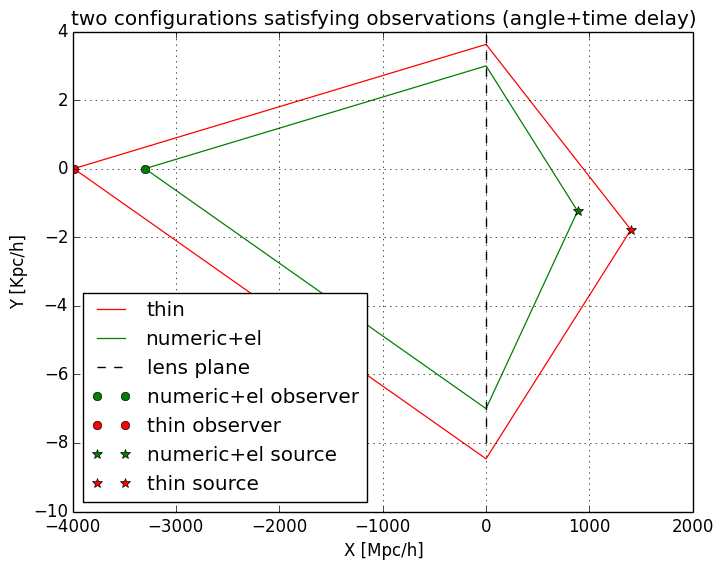

PyObject <matplotlib.text.Text object at 0x31aa3e750>

In [65]:
hold(false)
plot(utx/1e3,uty,"-r",lw=0.9,label="thin")
hold(true)
plot(dtx/1e3,-dty,"-r",lw=0.9)
#plot(udx/1e3,udy,"-y",lw=0.9)
#plot(ddx/1e3,-ddy,"-y",lw=0.9)
plot(uex/1e3,uey,"-g",lw=0.9, label="numeric+el")
plot(dex/1e3,-dey,"-g",lw=0.9)
plot([0,0],[-8,4],"--k", label="lens plane")
plot([uex[1]/1e3],[uey[1]],"og",label="numeric+el observer")
plot([utx[1]/1e3],[uty[1]],"or",label="thin observer")

plot([uex[end]/1e3],[uey[end]],"*g",ms=7, label="numeric+el source")
plot([utx[end]/1e3],[uty[end]],"*r",ms=7, label="thin source")

hold(false)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
#legend(["thin","", "numeric+el","", "lens plane"], loc=3)
legend(loc=3)
title("two configurations satisfying observations (angle+time delay)")

In [66]:
udt = time(massfunc, udx, udy);
ddt = time(massfunc, ddx, ddy);
delta_d = abs(udt-ddt);
utt = time(massfunc, utx, uty);
dtt = time(massfunc, dtx, dty);
delta_t = abs(utt-dtt);
uet = time(massfunc, uex, uey);
det = time(massfunc, dex, dey);
delta_e = abs(uet-det);
@show delta_t;
@show delta_d;
@show delta_e;

delta_t = 6.696865284538944e-11
delta_d = 4.852651613873604e-11
delta_e = 6.681588615720102e-11


# Time 2

In [91]:
setprecision(128)
b = big"3.0";
rs = big"3.3e6";
tg = b/rs
f = 0.88
up_tx, up_ty, up_tu, up_tdu, up_tia, up_toa, up_tda, tθ =
thin(r->projmass(r)*f, 0.0, rs, tg, 100000);
up_ex, up_ey, up_eu, up_edu, up_eia, up_eoa, up_eda, up_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000);

b = big"7.0";
rs = big"3.3e6";
tg = b/rs
down_tx, down_ty, down_tu, down_tdu, down_tia, down_toa, down_tda, down_tθ =
thin(r->projmass(r)*f, 0.0, rs, tg, 100000);
down_ex, down_ey, down_eu, down_edu, down_eia, down_eoa, down_eda, down_eθ =
    numeric_el(massfunc, rhofunc, 0.0, rs, tg, 100000);

In [92]:
utx,uty,dtx,dty = extrapolate_to_meeting(up_tx,up_ty,down_tx,down_ty);
uex,uey,dex,dey = extrapolate_to_meeting(up_ex,up_ey,down_ex,down_ey);

utt = time(r->massfunc(r)*f, utx, uty);
dtt = time(r->massfunc(r)*f, dtx, dty);
delta_t = abs(utt-dtt);
uet = time(massfunc, uex, uey);
det = time(massfunc, dex, dey);
delta_e = abs(uet-det);
@show delta_t;
@show delta_e;

delta_t = 4.972378064849181e-11
delta_e = 4.99549596668777677960744805803512317842e-11


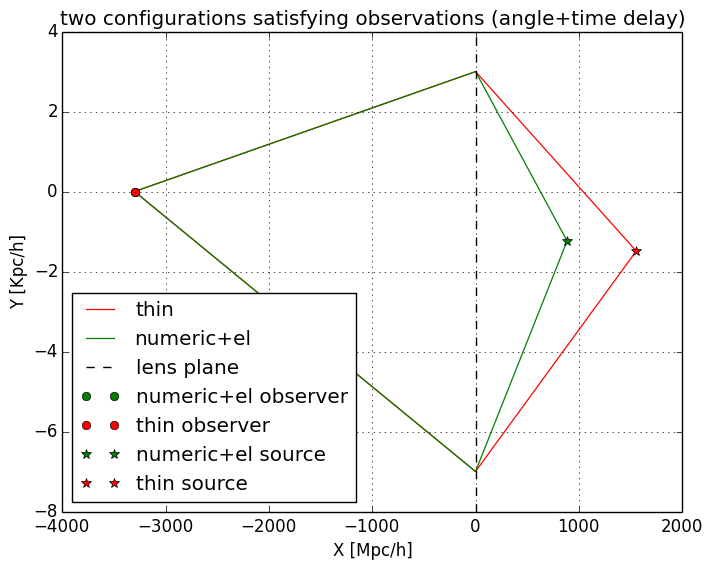

PyObject <matplotlib.text.Text object at 0x31b6aab90>

In [93]:
dtx = to_small(dtx)
dty = to_small(dty)
utx = to_small(utx)
uty = to_small(uty)

dex = to_small(dex)
dey = to_small(dey)
uex = to_small(uex)
uey = to_small(uey)

hold(false)
plot(utx/1e3,uty,"-r",lw=0.9,label="thin")
hold(true)
plot(dtx/1e3,-dty,"-r",lw=0.9)
plot(uex/1e3,uey,"-g",lw=0.9, label="numeric+el")
plot(dex/1e3,-dey,"-g",lw=0.9)
plot([0,0],[-8,4],"--k", label="lens plane")
plot([uex[1]/1e3],[uey[1]],"og",label="numeric+el observer")
plot([utx[1]/1e3],[uty[1]],"or",label="thin observer")

plot([uex[end]/1e3],[uey[end]],"*g",ms=7, label="numeric+el source")
plot([utx[end]/1e3],[uty[end]],"*r",ms=7, label="thin source")

hold(false)
grid(true)
xlabel("X [Mpc/h]")
ylabel("Y [Kpc/h]")
#legend(["thin","", "numeric+el","", "lens plane"], loc=3)
legend(loc=3)
title("two configurations satisfying observations (angle+time delay)")

# Precision test

In [8]:
for prec in [1.0e-8, 1.0e-12, 1.0e-16, 1.0e-20]
    get_delay_hrs(128, big"3.0", big"7.01", big"3.3e6", prec);
    get_delay_hrs(128, big"3.0", big"0.01", big"3.3e6", prec);
end;

"128, 7.009999999999999999999999999999999999992, 9.026794308431694465937683715931632089449e-11"

"128, 1.000000000000000000000000000000000000001e-02, 1.294067945966521968074101138740261587744e-12"

"128, 7.009999999999999999999999999999999999992, 9.026794308431694465937683715931632089449e-11"

"128, 1.000000000000000000000000000000000000001e-02, 1.294067945966521968074101138740261587744e-12"

"128, 7.009999999999999999999999999999999999992, 9.026794308431694465937683715931632089449e-11"

"128, 1.000000000000000000000000000000000000001e-02, 1.294067945966521968074101138740261587744e-12"

"128, 7.009999999999999999999999999999999999992, 9.026794308431694465937683715931632089449e-11"

"128, 1.000000000000000000000000000000000000001e-02, 1.294067945966521968074101138740261587744e-12"